# Flight Price Prediction

## Predicting Flight Prices

## Introduction

In today's world, where travel has become an integral part of our lives, securing the best deals on flight tickets is of utmost importance. Flight prices are dynamic, influenced by a myriad of factors, including airline carriers, booking windows, departure times, and class preferences. For travelers seeking cost-effective and efficient ways to plan their journeys, understanding the underlying patterns in flight ticket pricing is invaluable.

This project embarks on a journey to uncover the intricate dynamics of flight pricing using a comprehensive dataset obtained from the "Ease My Trip" website. Our mission is not only to predict flight prices accurately but also to unravel valuable insights that will empower travelers in their quest for budget-friendly and convenient travel options.

### Data Collection and Methodology

The dataset used in this project was sourced from Kaggle, specifically from the dataset titled "Flight Price Prediction," available at [this link](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction). It contains comprehensive information about flight booking options from the "Ease My Trip" website for flight travel between India's top 6 metro cities.

The dataset consists of 300,261 distinct flight booking options and spans a 50-day period, from February 11th to March 31st, 2022. It was curated for the purpose of conducting data analysis and building predictive models to forecast flight prices accurately.

### Features

The dataset encompasses 11 essential features, including airline, flight code, source city, departure time, stops, arrival time, destination city, class, duration, days left, and the target variable—price.

In this project, we will employ data preprocessing, feature engineering, and various machine learning models to predict flight prices accurately. Our objective is not only to build predictive models but also to provide travelers with valuable insights that can aid them in making informed decisions when booking flight tickets.

Join me on this expedition as we navigate through data, algorithms, and insights to demystify the world of flight pricing and empower travelers to embark on their journeys with confidence and cost-effectiveness.

# Importing Libraries And Loading Data

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Getting the data

data = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv', index_col=0)

# Exploratory Data Analysis

## Brief Overview

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [4]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [5]:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Price Distribution

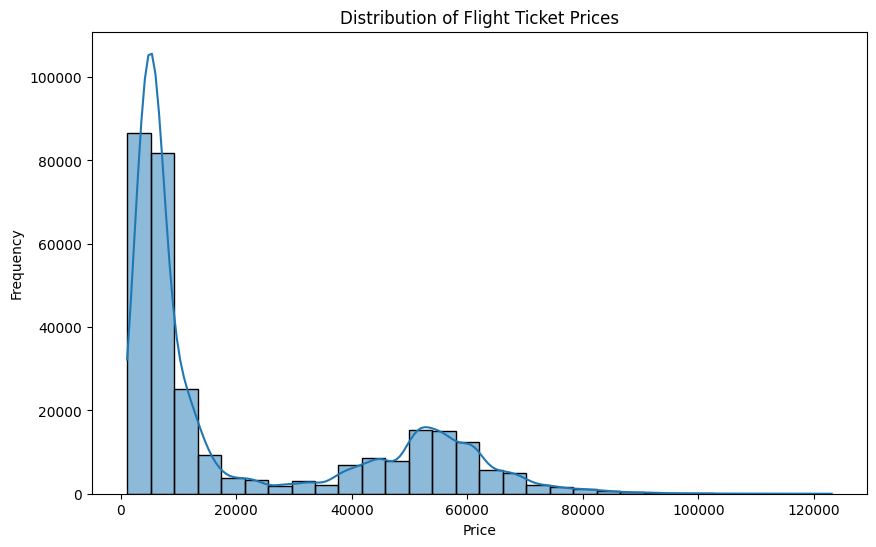

Mean Price: 20889.660523133203
Median Price: 7425.0
Standard Deviation of Price: 22697.76736607447
Minimum Price: 1105
Maximum Price: 123071


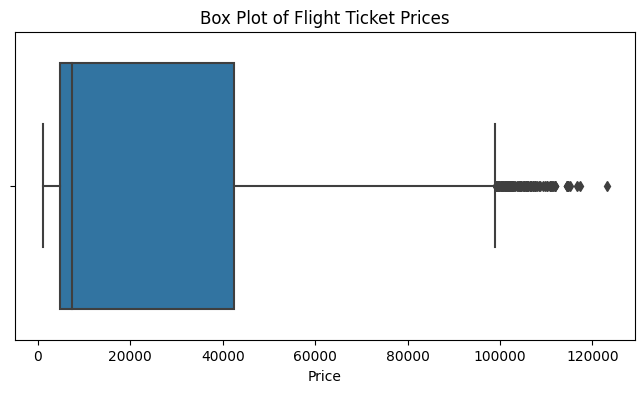

In [6]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Flight Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Calculate summary statistics
price_mean = data['price'].mean()
price_median = data['price'].median()
price_std = data['price'].std()
price_min = data['price'].min()
price_max = data['price'].max()

print(f"Mean Price: {price_mean}")
print(f"Median Price: {price_median}")
print(f"Standard Deviation of Price: {price_std}")
print(f"Minimum Price: {price_min}")
print(f"Maximum Price: {price_max}")

# Create a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['price'])
plt.title('Box Plot of Flight Ticket Prices')
plt.xlabel('Price')
plt.show()

## Airline Analysis

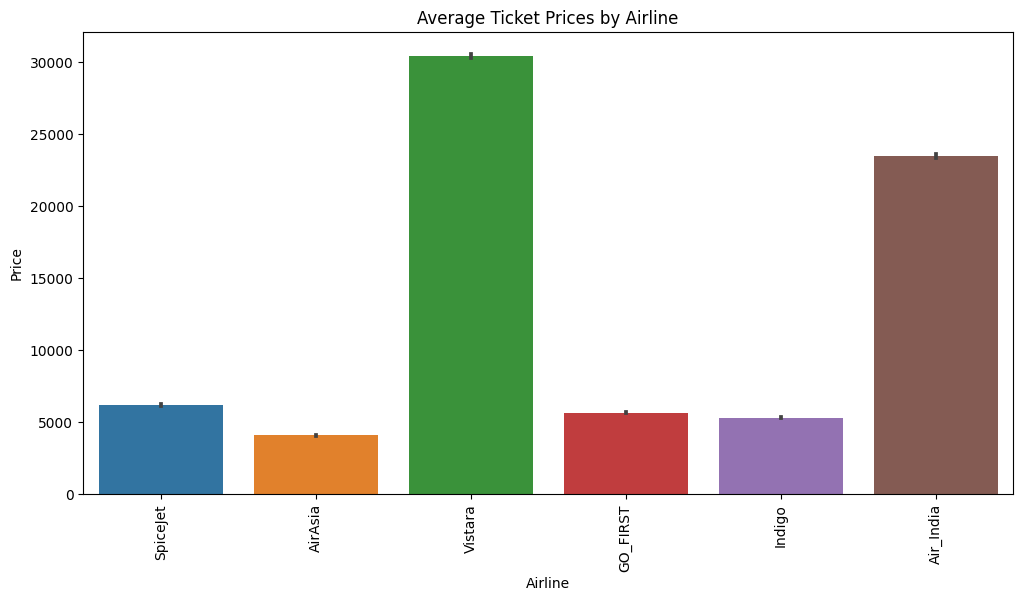

In [7]:
# Create a bar plot to compare airline prices
plt.figure(figsize=(12, 6))
sns.barplot(x='airline', y='price', data=data)
plt.title('Average Ticket Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Time-Based Patterns
Analyze how ticket prices change based on the time of booking. Look at trends in prices when booking well in advance versus just 1 or 2 days before departure.


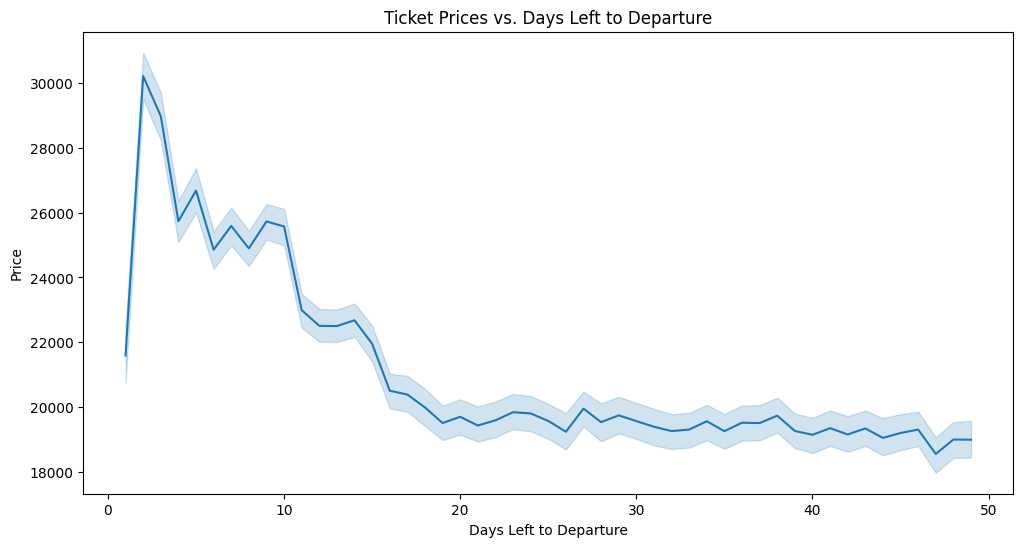

In [8]:
# Create a line plot to visualize price trends based on days left to departure
plt.figure(figsize=(12, 6))
sns.lineplot(x='days_left', y='price', data=data)
plt.title('Ticket Prices vs. Days Left to Departure')
plt.xlabel('Days Left to Departure')
plt.ylabel('Price')
plt.show()

## Duration vs. Price
Explore the relationship between the duration of the flight and ticket prices.

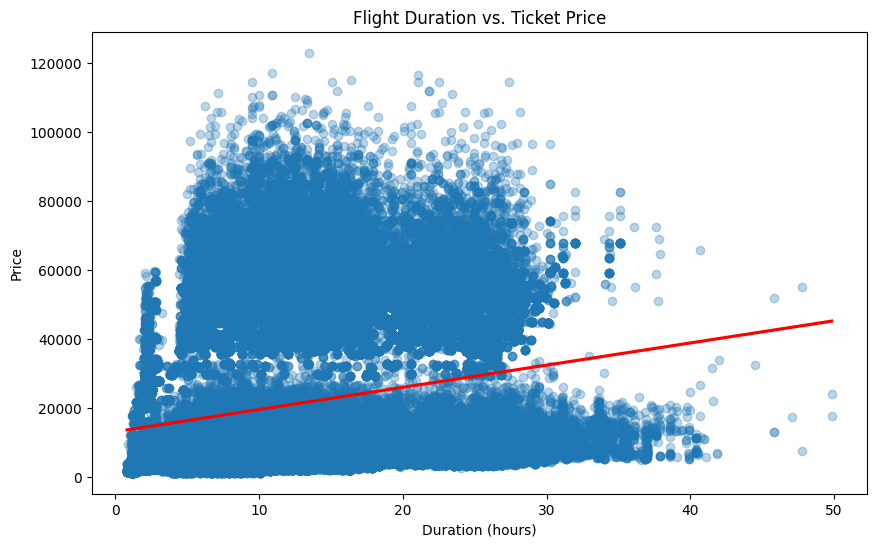

In [9]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='duration', y='price', data=data, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Flight Duration vs. Ticket Price')
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.show()

## Correlation Analysis
Calculate and visualize correlations between numerical features (e.g., price, duration) and other variables.

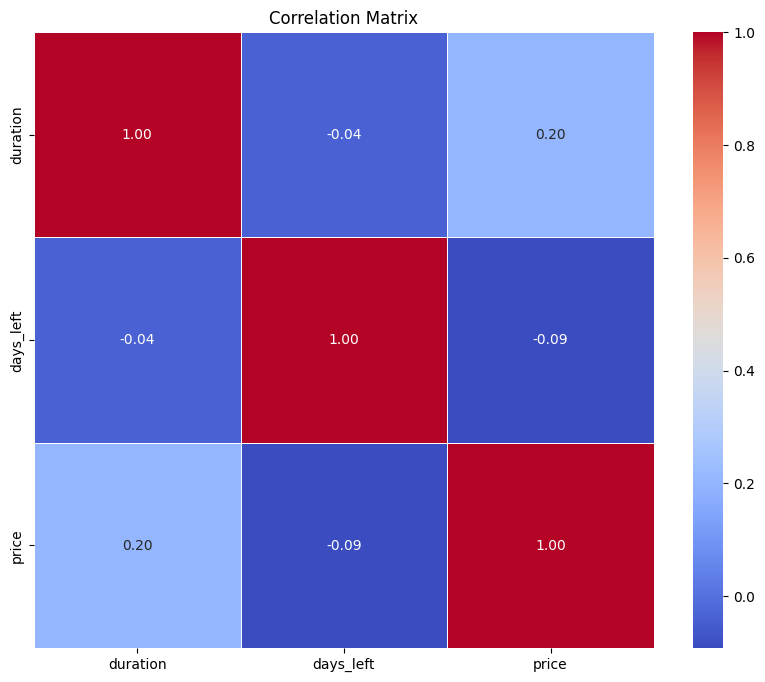

In [10]:
# Select only numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

In [11]:
#  Remove redundant columns
dataset = data.drop(columns=["flight", "arrival_time", "departure_time"])

In [12]:
from sklearn.model_selection import train_test_split

y = dataset['price']
X = dataset.drop(columns=['price'])

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define categorical and numerical columns
categorical_columns = ['airline', 'source_city', 'stops', 'destination_city', 'class']
numerical_columns = ['duration', 'days_left']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])


# Preprocessing of training data 
X_train_transformed = preprocessor.fit_transform(X_train)

X_test_transformed = preprocessor.transform(X_test)

# Hyperparameter Tuning
- We will use a subset of training data to speed up the process.
- Once we get parameters for optimised model we will train the the final model on full training data

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Define a dictionary of models and their respective hyperparameter grids
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'param_grid': {}  # Add hyperparameters for Linear Regression if needed
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'param_grid': {
            'n_estimators': [40, 60, 100],
            'max_depth': [10, 20, 30],
            'min_samples_split': [3, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'Support Vector Machine': {
        'model': SVR(),
        'param_grid': {
            'C': [1, 10],
            'kernel': ['rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    }
}

X_train_subset = X_train_transformed[:10000]
y_train_subset = y_train[:10000]

best_models = {}

# Loop through each model and perform GridSearchCV
for model_name, model_info in models.items():
    model = model_info['model']
    param_grid = model_info['param_grid']
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
    
    grid_search.fit(X_train_subset, y_train_subset)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Store the best model and hyperparameters
    best_models[model_name] = {'best_params': best_params, 'best_model': best_model}

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [15]:
X_test_subset = X_test_transformed[:10000]
y_test_subset = y_test[:10000]

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Evaluate the best models on subset of the test data
for model_name, model_info in best_models.items():
    best_model = model_info['best_model']
    y_pred_best = best_model.predict(X_test_subset)
    
    mae_best = mean_absolute_error(y_test_subset, y_pred_best)
    mse_best = mean_squared_error(y_test_subset, y_pred_best)
    r2_best = r2_score(y_test_subset, y_pred_best)
    
    print(f"{model_name} Metrics:")
    print(f"Mean Absolute Error (MAE): {mae_best:.2f}")
    print(f"Mean Squared Error (MSE): {mse_best:.2f}")
    print(f"R-squared (R2): {r2_best:.2f}")
    print(f"The parameters of the best model:\n{model_info['best_params']}")
    print()

Linear Regression Metrics:
Mean Absolute Error (MAE): 4565.69
Mean Squared Error (MSE): 47189176.59
R-squared (R2): 0.91
The parameters of the best model:
{}

Random Forest Metrics:
Mean Absolute Error (MAE): 2402.11
Mean Squared Error (MSE): 20133697.83
R-squared (R2): 0.96
The parameters of the best model:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Support Vector Machine Metrics:
Mean Absolute Error (MAE): 13618.99
Mean Squared Error (MSE): 526929999.31
R-squared (R2): -0.01
The parameters of the best model:
{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}



In [17]:
# Linear Regression Metrics:
# Mean Absolute Error (MAE): 4565.69
# Mean Squared Error (MSE): 47189176.59
# R-squared (R2): 0.91
# The parameters of the best model:
# {}

# Random Forest Metrics:
# Mean Absolute Error (MAE): 2389.19
# Mean Squared Error (MSE): 20199979.43
# R-squared (R2): 0.96
# The parameters of the best model:
# {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

# Support Vector Machine Metrics:
# Mean Absolute Error (MAE): 13618.99
# Mean Squared Error (MSE): 526929999.31
# R-squared (R2): -0.01
# The parameters of the best model:
# {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}

In [18]:
# import joblib

# for model_name, model_info in best_models.items():
#     joblib_file = f"flight_price_predicter_{model_name}.joblib"
#     joblib.dump(model_info['best_model'], joblib_file)

# Train The Final Model

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Define the best hyperparameters
best_rf_params = {
    'n_estimators': 100,
    'max_depth': 30,
    'min_samples_split': 5,
    'min_samples_leaf': 2
}

best_rf_model = RandomForestRegressor(**best_rf_params)
best_rf_model.fit(X_train_transformed, y_train)

[CV] END .................................................... total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=60; total time=   3.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   6.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   2.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=40; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=40; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=60; total time=   3.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   2.2s
[CV] END max_depth

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5)

# Evaluate The Final Model

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the testing data
y_pred = best_rf_model.predict(X_test_transformed)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1329.1076214184511
Mean Squared Error (MSE): 9643828.305842051
R-squared (R2): 0.9812916393049284


In [21]:
import joblib

model_filename = 'final_rf_model.joblib'
joblib.dump(best_rf_model, model_filename)

print(f"Model saved as '{model_filename}'")

Model saved as 'final_rf_model.joblib'
